**Linear Discriminant Analysis**

**Student Name:** Prasanna Sundararajan Muthukumaran

**UTA ID:** 1001937587

In [1]:
# Importing all the necessary packages

import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris

%matplotlib widget

In [2]:
# Loading Iris dataset using scikit-learn
iris_df = load_iris()

In [3]:
iris_df

{'data': array([[5.1, 3.5, 1.4, 0.2],
        [4.9, 3. , 1.4, 0.2],
        [4.7, 3.2, 1.3, 0.2],
        [4.6, 3.1, 1.5, 0.2],
        [5. , 3.6, 1.4, 0.2],
        [5.4, 3.9, 1.7, 0.4],
        [4.6, 3.4, 1.4, 0.3],
        [5. , 3.4, 1.5, 0.2],
        [4.4, 2.9, 1.4, 0.2],
        [4.9, 3.1, 1.5, 0.1],
        [5.4, 3.7, 1.5, 0.2],
        [4.8, 3.4, 1.6, 0.2],
        [4.8, 3. , 1.4, 0.1],
        [4.3, 3. , 1.1, 0.1],
        [5.8, 4. , 1.2, 0.2],
        [5.7, 4.4, 1.5, 0.4],
        [5.4, 3.9, 1.3, 0.4],
        [5.1, 3.5, 1.4, 0.3],
        [5.7, 3.8, 1.7, 0.3],
        [5.1, 3.8, 1.5, 0.3],
        [5.4, 3.4, 1.7, 0.2],
        [5.1, 3.7, 1.5, 0.4],
        [4.6, 3.6, 1. , 0.2],
        [5.1, 3.3, 1.7, 0.5],
        [4.8, 3.4, 1.9, 0.2],
        [5. , 3. , 1.6, 0.2],
        [5. , 3.4, 1.6, 0.4],
        [5.2, 3.5, 1.5, 0.2],
        [5.2, 3.4, 1.4, 0.2],
        [4.7, 3.2, 1.6, 0.2],
        [4.8, 3.1, 1.6, 0.2],
        [5.4, 3.4, 1.5, 0.4],
        [5.2, 4.1, 1.5, 0.1],
  

In [4]:
class Linear_Discriminant_Analysis():
    # Initializing the class object
    def __init__(self, components):
        self.components = components    # Number of components
        self.linear_discriminants = None    # To store the eigen vectors
    
    def fit(self, iris_data, iris_target):
        self.X = iris_data    # Data
        self.Y = iris_target    # Target
        self.N = iris_data.shape[0]    # Total number of samples
        self.features = iris_data.shape[1]    # Number of features ('4' in iris dataset)
              
        # Computing the within class (SW) & between class (SB) matrices
        total_mean = np.mean(self.X, axis = 0)    # Mean value of a column
        SW = np.zeros((self.features, self.features))
        SB = np.zeros((self.features, self.features))
 
        for class_type in np.unique(self.Y):
            SW = SW + np.cov(self.X[self.Y == class_type].T)
            
            Mean_class = np.mean(self.X[self.Y == class_type], axis=0)    # Mean of each class columnwise                                                         
            samples_per_class = self.X[self.Y == class_type].shape[0]    # Number of samples in each class
            SB = SB + (samples_per_class * ((Mean_class - total_mean).reshape(self.features, 1)).dot((Mean_class - total_mean).reshape(self.features, 1).T))
        
        # Computing the eigen values and eigen vector
        A = np.linalg.inv(SW).dot(SB)    # inverse(SW) * SB
        eigenvalues, eigenvectors = np.linalg.eig(A)
        
        index = np.argsort(abs(eigenvalues))[::-1]    # Obtaining the indinces of the largest eigen values 
        eigenvalues = eigenvalues[index]
        eigenvectors = eigenvectors.T[index]
        self.linear_discriminants = eigenvectors[0 : self.components]    # Selecting the first 'N' eigenvectors
        
    def predict(self, X):
        return np.dot(X, self.linear_discriminants.T)

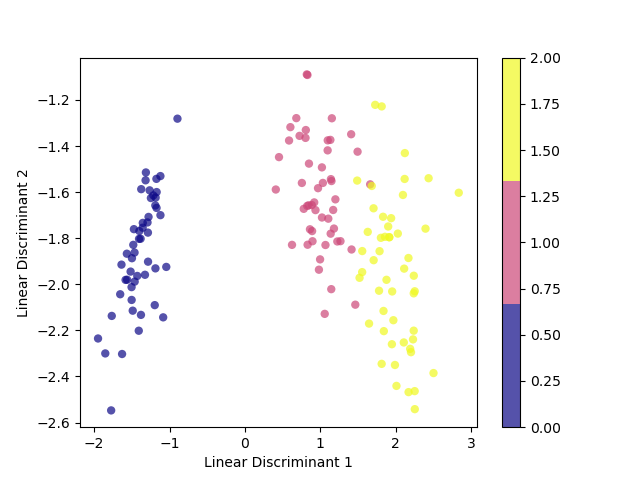

In [5]:
def main():
    x = np.array(iris_df.data)    # Data
    y = np.array(iris_df.target)    # Target
    lda_model = Linear_Discriminant_Analysis(3)
    lda_model.fit(x, y)
    
    x_lda = lda_model.predict(x)
    plt.scatter(x_lda[:, 0], x_lda[:, 1], c=y, edgecolor="none", alpha=0.7, cmap=plt.cm.get_cmap("plasma", 3))
    plt.xlabel("Linear Discriminant 1")
    plt.ylabel("Linear Discriminant 2")
    plt.colorbar()
    plt.show()
    
if __name__ == "__main__":
    main()

**References**

https://towardsdatascience.com/linear-discriminant-analysis-in-python-76b8b17817c2#:~:text=Linear%20Discriminant%20Analysis%20(LDA)%20is,as%20much%20information%20as%20possible.